In [1]:
%load_ext autoreload
%autoreload 2
import warnings; warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from openquake.hazardlib.geo import NodalPlane
from openquake.hazardlib.pmf import PMF
from openquake.hazardlib.imt import PGA, PGV, SA
import shakemap_lite as sml

Get some sites ... here I'm just slicing from the USGS Vs30 topography data, but can be any site model.

Should be a dictionary of `{"lon": ..., "lat": ..., "vs30": ...}`

{'lon': array([-72.99166667, -72.98333333, -72.975     , ..., -68.01666667,
       -68.00833333, -68.        ]), 'lat': array([-28., -28., -28., ..., -33., -33., -33.]), 'vs30': array([600.        , 600.        , 600.        , ..., 281.32192993,
       263.02108765, 256.07669067])}


Text(0.5, 1.0, 'Vs30 m/s')

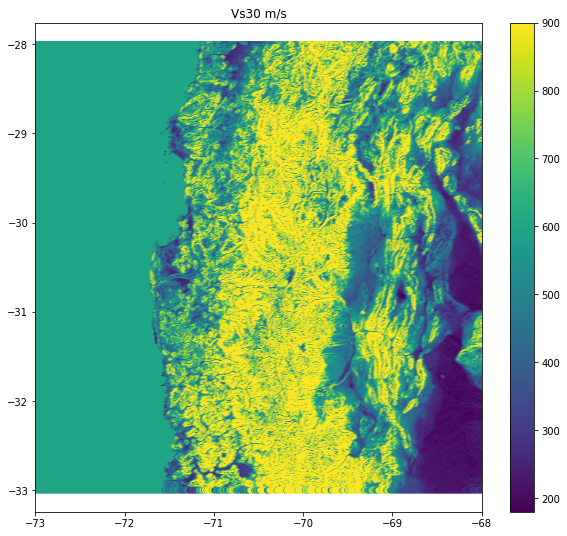

In [6]:
# Get some sites
#sites = sml.get_vs30_sites_from_bbox([5., 7., 47., 49.])
sites = sml.get_vs30_sites_from_bbox([-73, -68, -33, -28])
print(sites)
plt.figure(figsize=(10,9))
plt.scatter(sites["lon"], sites["lat"], c=sites["vs30"], edgecolor="None")
plt.colorbar()
plt.axis('equal')
plt.xlim(-73, -68)
plt.ylim(-33., -28)
plt.title("Vs30 m/s")

Setup the event

In [41]:
# Build an event - e.g. M 5.5
eq_lon = -71.808
eq_lat = -30.8819
eq_depth = 28
mag = 8.2
strike = 9
dip = 18
rake =90
event = sml.Event("EQ001", eq_lon, eq_lat, eq_depth, mag, strike=strike, dip=dip, rake=rake)
print(event)

EQ001|-71.80800|-30.88190|28.00000|8.20


Text(0.5, 1.0, 'Vs30 m/s')

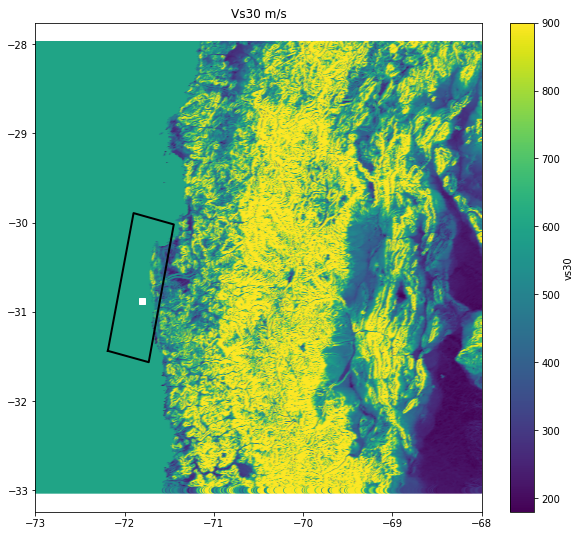

In [50]:
# The rupture generation can take place inside the shakemap - or can be input
rupt = event.get_rupture()
rlons, rlats = rupt.surface.get_surface_boundaries()
plt.figure(figsize=(10,9))
plt.scatter(sites["lon"], sites["lat"], c=sites["vs30"], edgecolor="None")
plt.plot(rlons[0], rlats[0], 'k-', lw=2)
plt.plot(eq_lon, eq_lat, "ws")
plt.colorbar(label="vs30")
plt.axis('equal')
plt.xlim(-73, -68)
plt.ylim(-33., -28)
plt.title("Vs30 m/s")

Run the shakemap

In [51]:
# Run the shakemap - for 3 IMTs and 3 GMPEs
imts = ["PGA", "SA(0.3)", "SA(1.0)"]
gmpes = ["BindiEtAl2014Rjb", "CauzziEtAl2014", "AkkarEtAlRjb2014"]
# Setup the shakemap tool with the desired GMPEs and - only needs to be done once.
# Note that modification to consider different sets of GMPEs organised by tectonic region is simple
shakemap = sml.ShakemapLite("dbfile.hdf5", gmpes, imts)
# Deletes any existing database of the same name
shakemap.reset()
# Runs the shakemap for a given event and site configuration
shakemap(event, sites)

Shakemap results are stored in a database organised by `EVENTID/GMPE/IMT/median` and/or `EVENTID/GMPE/IMT/sigma` 

(-33.0, -28)

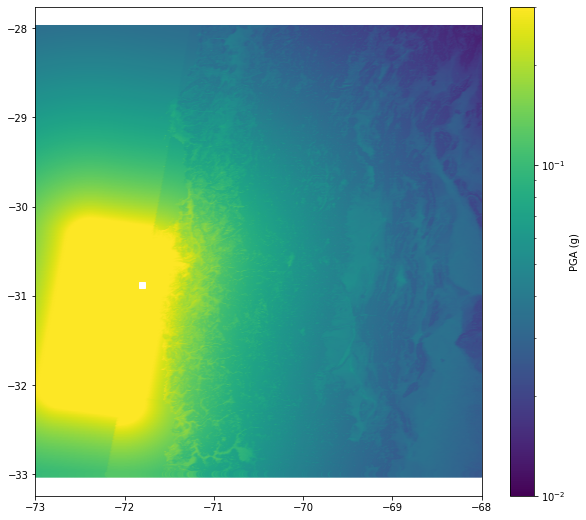

In [53]:
# To retrieve a particular GMPE and IMT
bindi_pga = shakemap["EQ001/BindiEtAl2014Rjb/PGA/median"]

plt.figure(figsize=(10,9))
plt.scatter(sites["lon"], sites["lat"], c=bindi_pga, edgecolor="None", norm=LogNorm(vmin=0.01, vmax=0.3))
plt.plot(eq_lon, eq_lat, "ws")
plt.colorbar(label="PGA (g)")
plt.axis('equal')
plt.xlim(-73, -68)
plt.ylim(-33., -28)
